# 固有値と共分散

主成分分析ではデータの分散を情報の量として扱い、固有値を用いて分散が最大化される軸を選ぶ

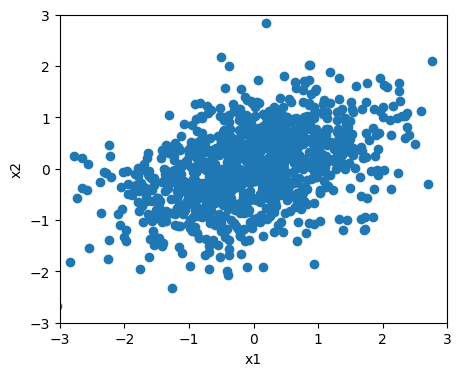

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

w = 0.3
n = 1000
x1 = norm.rvs(loc=0, scale=1, size=n, random_state=0)
x2 = w * x1 + (1 - w) * norm.rvs(loc=0, scale=1, size=n, random_state=1)
X = np.append(x1.reshape(-1, 1), x2.reshape(-1, 1), axis=1)
df = pd.DataFrame(X)

fig, ax = plt.subplots(figsize=[5, 4])
ax.scatter(x1, x2)
ax.set(xlabel="x1", ylabel="x2", xlim=(-3, 3), ylim=(-3, 3))
fig.show()

In [69]:
Cov = np.cov(X, rowvar=False)

In [70]:
import numpy as np

lambdas, vectors = np.linalg.eig(Cov)
print(f"""
λ={lambdas}
a1={vectors[:, 1].round(3)}
a2={vectors[:, 0].round(3)}
""")


λ=[1.13946673 0.40382115]
a1=[-0.473  0.881]
a2=[0.881 0.473]



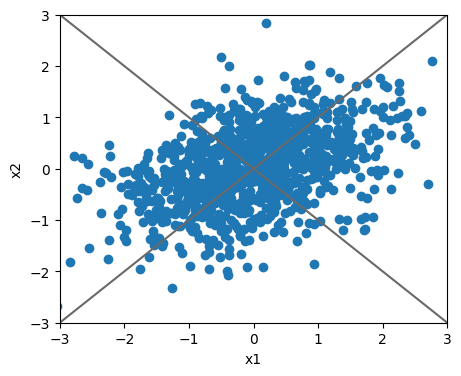

In [85]:
# 回転軸を描きたかったができなかった
# 45度線を描いたが違うっぽい
fig, ax = plt.subplots(figsize=[5, 4])
ax.axline((-1, -1), (1, 1), color="dimgray")
ax.axline((-1, 1), (1, -1), color="dimgray")
ax.scatter(x1, x2)
ax.set(xlabel="x1", ylabel="x2", xlim=(-3, 3), ylim=(-3, 3))
fig.show()

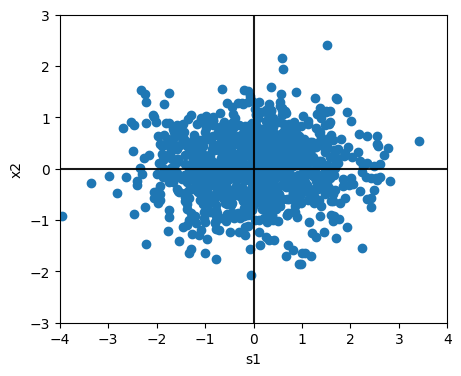

In [82]:
# 軸の回転
S = X @ vectors

fig, ax = plt.subplots(figsize=[5,4])
ax.scatter(S[:, 0], S[:, 1])
ax.set(xlabel="s1", ylabel="x2", xlim=(-4, 4), ylim=(-3, 3))
ax.axvline(x=0, color="black", alpha=0.9)
ax.axhline(y=0, color="black", alpha=0.9)
fig.show()